<b><font size="6"><u>Decision Trees</u></font></b>

In this notebook we are going to apply Decision Trees in Python.

# <font color='#BFD72F'>Contents</font> <a class="anchor" id="toc"></a>

* [1 - Initial Steps](#first-bullet)
    * [1.1 - Connect to Google Colab](#first-bullet)
    * [1.2 - Importing Libraries and Data](#import)
    * [1.3 - Data Understanding](#understand)
    * [1.4 - Split the Data](#split)
* [2 - Classification Trees](#classif)
    * [2.1 - Attributes in Decision Tree Classifier](#attdt)
    * [2.2 - Parameters in Decision Tree Classifier](#pardt)
* [3 - Overfitting in Decision Trees](#overfit)
    * [3.1 - Changing the Maximum Depth](#maxd)
    * [3.2 - Changing the Number of Leaf Nodes](#nleaf)
    * [3.3 - Deciding How to Prune](#prune)
* [4 - Multiclass problem with Decision Trees](#multi)
* [5 - Regression Trees](#reg)
* [6 - Extra: Classification Cut-off](#cutoff)

<font color='#BFD72F' size="5"> What are Decision Trees?</font> <br>
<font size="1">Daniel T. Larose, Chantal D. Larose (2015) “Data Mining and Predictive Analytics,” 2nd Edition, Wiley (pp. 317-319)</font>

A **decision tree** is a collection of decision nodes, connected by branches, extending downward from the root node until terminating in leaf nodes. Beginning at the **root node**, which by convention is placed at the top of the decision tree diagram, attributes are tested at the **decision nodes**, with each possible outcome resulting in a **branch**. Each branch
then leads either to another decision node or to a terminating **leaf node**.

**Root node** - The root node is the topmost node of the tree, and it represents the entire population being analyzed. It may have one or more child nodes.<br>
**Internal node** - An internal node or decision node is any node between the root node and the leaves, thus having child nodes.<br>
**Leaf node** - A leaf node is a node which does not have a child. Those can be pure if all observations on it belong to the same class, or impure otherwise.<br>
**Branches** - The branches represent possible outcomes that will lead to additional nodes.

<img src="https://drive.google.com/uc?id=1Ctpvv_cK3rRfnNwvh_kv4o-M64rjjGvI" width="450px"> <img name="decision_trees.png">

Summed up:
- Decision trees can be though of as classification tools (the objective is to discriminate between classes)<br>
- They represent rules, which are usually simple to interpret <br>
- Sometimes the reasons that underlie certain decisions are of paramount importance! <br>

Note: When the target variable is continuous we can use a regression tree!

# <font color='#BFD72F'>1. Initial Steps</font> <a class="anchor" id="first-bullet"></a>

## <font color='#BFD72F'>1.1. Connect to Google Colab</font> <a class="anchor" id="first-bullet"></a>
[Back to Contents](#toc)

**Step 1 -** Connect the google colab notebook with your google drive. Before running the code below, make sure you have this notebook in the folders mentioned in the variable `path`.<br>

In [1]:
# Connect Google Colab to Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Colab Notebooks/DM2/LAB04 - Decision Trees and Ensembles/'

Mounted at /content/drive


## <font color='#BFD72F'>1.2. Importing Libraries and Data</font><a class="anchor" id="import"></a>
[Back to Contents](#toc)

**Step 2 -** Import the needed libraries.

Note: For better undestanding of the contents we will import most packages on a need basis.
However, importing everything that you intend to use in a single cell is generally regarded as a desirable good practice.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

**Step 3 -** Import the data that is going to be used into `pandas` dataframes.

**Step 3.1 -** Import and check the diabetes dataset.

In [3]:
diabetes = pd.read_csv(path + 'data/diabetes.csv')
diabetes.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


<font color='orange'>____GOAL____  : </font> Predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

`Pregnancies` Number of times pregnant <br>
`Glucose` Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br>
`BloodPressure`Diastolic blood pressure (mm Hg)<br>
`SkinThickness`Triceps skin fold thickness (mm)<br>
`Insulin`2-Hour serum insulin (mu U/ml)<br>
`BMI` Body mass index (weight in kg/(height in m)^2)<br>
`DiabetesPedigreeFunction` Diabetes pedigree function<br>
`Age`Age (years)<br>
`Outcome` Class variable (0 or 1)
<- <font color='orange'> **Dependent Variable / Target** </font>

**Step 3.2 -** Import and check the academic_success dataset (multiclass).

In [4]:
academic_success = pd.read_csv(path + 'data/academic_success.csv', sep = ';')
academic_success.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout


<font color='orange'>____GOAL____  : </font> Three-category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course.

`Marital Status`  1 – single, 2 – married, 3 – widower, 4 – divorced, 5 – facto union, 6 – legally separated<br>
`Application mode`  Detailed explanation of various application modes<br>
`Application order` (between 0 - first choice; and 9 last choice)<br>
`Course` Course number (detailed explanation by source link)<br>
`Daytime/evening attendance` 1 – daytime, 0 - evening<br>
`Previous qualification` Qualiffication number (detailed explanation by source link)<br>
`Previous qualification (grade)` Grade of previous qualification (between 0 and 200)<br>
`Nationality`  Nationality number (detailed explanation by source link <br>
`Mother's qualification`  Qualification number (detailed explanation by source link)<br>
`Father's qualification`  Qualification number (detailed explanation by source link)<br>
`Mother's occupation`  Occupation number (detailed explanation by source link)<br>
`Father's occupation`  Occupation number (detailed explanation by source link)<br>
`Admission grade`  (between 0 and 200)<br>
`Displaced` 1 – yes, 0 – no<br>
`Educational special needs`  1 – yes, 0 – no<br>
`Debtor` 1 – yes, 0 – no<br>
`Tuition fees up to date` 1 – yes, 0 – no<br>
`Gender` 1 – male, 0 – female<br>
`Scholarship holder` 1 – yes, 0 – no<br>
`Age at enrollment` Age of student at enrollment<br>
`International` 1 – yes, 0 – no<br>
`Curricular units 1st sem (credited)` Number of curricular units credited in the 1st semester<br>
`Curricular units 1st sem (enrolled)` Number of curricular units enrolled in the 1st semester<br>
`Curricular units 1st sem (evaluations)` Number of evaluations to curricular units in the 1st semester<br>
`Curricular units 1st sem (approved)` Number of curricular units approved in the 1st semester<br>
`Curricular units 1st sem (grade)` Grade average in the 1st semester (between 0 and 20)<br>
`Curricular units 1st sem (without evaluations)` Number of curricular units without evaluations in the 1st semester<br>
`Curricular units 2nd sem (credited)` Number of curricular units credited in the 2nd semester<br>
`Curricular units 2nd sem (enrolled)` Number of curricular units enrolled in the 2nd semester<br>
`Curricular units 2nd sem (evaluations)` Number of evaluations to curricular units in the 2nd semester<br>
`Curricular units 2nd sem (approved)` Number of curricular units approved in the 2nd semester<br>
`Curricular units 2nd sem (grade)` Grade average in the 2nd semester (between 0 and 20)<br>
`Curricular units 2nd sem (without evaluations)` Number of curricular units without evaluations in the 1st semester<br>
`Unemployment rate` Unemployment rate (%)<br>
`Inflation rate` Inflation rate (%)<br>
`GDP` GDP<br>
`Target` dropout, enrolled, or graduate at the end of the normal duration of the course
<- <font color='orange'> **Dependent Variable / Target** </font>

## <font color='#BFD72F'> 1.3. Data Understanding</font> <a class="anchor" id="understand"></a>
[Back to Contents](#toc)

**Step 4 -** Use the method value_counts() to look at the class distribution of the dependent variable.

In [5]:
academic_success['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794



**Step 5 -** Check target imbalance and choose columns we will work with from the academic_success dataset.

In [6]:
columns = ['Application order',
           'Previous qualification (grade)',
           'Admission grade',
           'Tuition fees up to date',
           'Age at enrollment',
           'Gender',
           'Scholarship holder',
           'International',
           'Curricular units 1st sem (grade)',
           'Curricular units 2nd sem (grade)',
           'Target']

academic_success = academic_success[columns]

## <font color='#BFD72F'> 1.4. Split the Data</font> <a class="anchor" id="split"></a>
[Back to Contents](#toc)

**Step 6 -** Perform data partition on the diabetes dataset.<br>
- Assign to the name ***data*** the diabetes dataset, excluding the dependent variable;
- Assign to the name ***target*** the dependent variable of the diabetes dataset;
- Create the datasets X_train, X_test, y_train, y_test using the data and the target. Define the test size to 0.2 and don't forget to stratify the partition by the target.



In [7]:
data = diabetes.drop(['Outcome'], axis=1)
target = diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, stratify=target, random_state=5)

**Step 7 -** Perform data partition on the academic success dataset.<br>
- Assign to the name ***X_multiclass*** the diabetes dataset, excluding the dependent variable;
- Assign to the name ***target_multiclass*** the dependent variable of the diabetes dataset;
- Create the datasets X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass using the data and the target. Define the test size to 0.2 and don't forget to stratify the partition by the target.

In [8]:
data_multiclass = academic_success.drop(['Target'], axis=1)
target_multiclass = academic_success['Target']
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass = train_test_split(data_multiclass,
                                                                                                target_multiclass,
                                                                                                test_size = 0.2,
                                                                                                stratify=target_multiclass,
                                                                                                random_state=5)

# <font color='#BFD72F'>2. Classification Trees</font> <a class="anchor" id="classif"></a>
[Back to Contents](#toc)

We can use different algorithms to build a classification tree. Those are DDT, ID3/C4.5 and CART (the last one can also be applied for regression problems).
- DDT (Divisive Decision Tree) uses **discriminate power** as a selection measure;
- In ID3 and C4.5, the concept of **entropy** and **information gain** is introduced;
- CART is similar to the previous algorithms, but uses the **Gini Index** instead of entropy.

**Step 8 -** Import `DecisionTreeClassifier` from `sklearn` and create an instance of it with the default parameters.

In [9]:
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier()

**Step 9 -** Use the `.fit()`method of the instance to fit the model to the array of points `X_train` and `y_train`. This will allow you to build a decision tree from the training set.

In [10]:
modelDT.fit(X_train, y_train)

DecisionTreeClassifier()

**Step 10 -** Use the package `tree` and `graphviz` to visualize the Decision Tree just created.

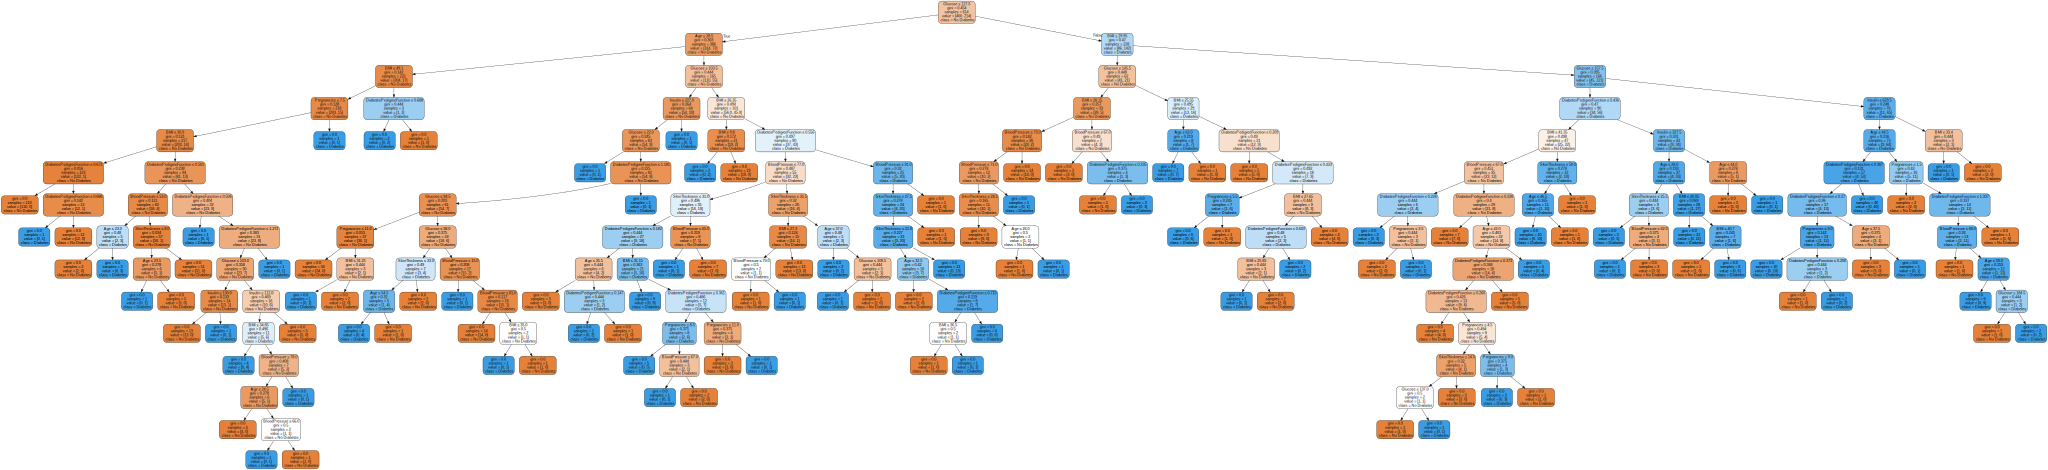

In [11]:
from sklearn import tree
import graphviz
# Process a decision tree graph using Graphviz
dot_data = tree.export_graphviz(modelDT,
                                out_file=None,
                                feature_names=data.columns,
                                class_names=["No Diabetes", "Diabetes"],
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

**Step 11 -** Make predictions with the fitted model and the test data.

In [12]:
y_pred = modelDT.predict(X_test)

**Step 12 -** Use the `.score()` method to obtain the mean accuracy of the given train data `X_train` and the true labels, `y_train`.

In [13]:
modelDT.score(X_train, y_train)

1.0

**Step 13 -** Use the `.score()` method to obtain the mean accuracy of the given train data `X_test` and the true labels, `y_test`.

In [14]:
modelDT.score(X_test, y_test)

0.6948051948051948

## <font color='#BFD72F'>2.1. Attributes in Decision Tree Classifier</font><a class="anchor" id="attdt"></a>
[Back to Contents](#toc)

**Step 14 -** Use the `.feature_importances_` attribute to obtain the feature importances (the higher the value, the more important the feature is).

In [15]:
modelDT.feature_importances_

array([0.05052269, 0.28895115, 0.08829928, 0.05659982, 0.04476396,
       0.18127411, 0.15160571, 0.13798328])

**Step 15 -** Plot the feature importance of each variable.

In [16]:
def plot_feature_importances(model,DF):
    n_features = DF.shape[1]
    plt.figure(figsize=(5,3))
    plt.barh(range(n_features), model.feature_importances_, color='yellowgreen')
    plt.yticks(np.arange(n_features), DF.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title('Feature Importance in Decision Tree Classifier')
    plt.show()

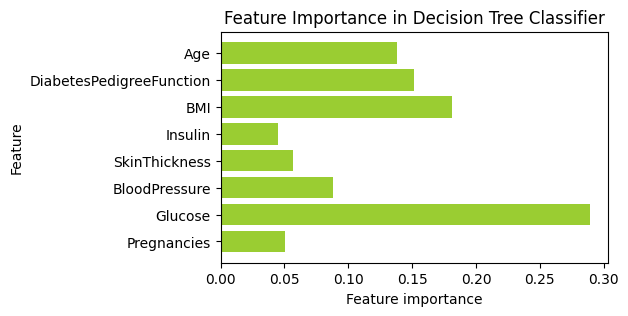

In [17]:
plot_feature_importances(modelDT,X_train)

## <font color='#BFD72F'>2.2. Parameters in Decision Tree Classifier</font><a class="anchor" id="pardt"></a>
[Back to Contents](#toc)

**Step 16 -** Change the split criterion to `entropy`. This is determined in the parameter `criterion`, which is the function to measure the quality of a split. Supported criteria are *gini* for the Gini impurity and *entropy* for the information gain.

In [18]:
modelDT_entropy = DecisionTreeClassifier(criterion='entropy')
modelDT_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

**Step 17 -** Use the `.score()` method to obtain the mean accuracy of the given train data `X_train` and the true labels for X, `y_train`.

In [19]:
modelDT_entropy.score(X_train, y_train)

1.0

**Step 18 -** Use the `.score()` method to obtain the mean accuracy of the given train data `X_test` and the true labels for X, `y_test`.

In [20]:
modelDT_entropy.score(X_test, y_test)

0.6818181818181818

Note: Ooops! Our trees seem to be overfitting... Let's see how to change that!


# <font color='#BFD72F'>3. Overfitting in Decision Trees</font> <a class="anchor" id="overfit"></a>
[Back to Contents](#toc)

One of the main limitations of Decision Trees is their propensity to overfit.

Pruning reduces the size of decision trees by removing parts of the tree that do not provide power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood.

In decision trees, we can have two pruning approaches:

1. In **prepruning**, we stop growing the tree earlier, before it perfectly classifies the training set. For that, we need to define some thresholds and stopping criterias. One possible example is the number of levels/layers that the tree has.

2. In **postpruning**, we allow the tree to perfectly classify the training set (by creating a full grown up tree), and then post prune the tree in order to avoid overfitting.

We are going to see how to preprune a tree.

## <font color='#BFD72F'>3.1. Changing the Maximum Depth</font><a class="anchor" id="maxd"></a>
[Back to Contents](#toc)

Note: By default, the nodes are expanded until all leaves are pure or until all leaves contain less than the min_samples_split samples.

**Step 19 -** Create a new model named where the maximum depth of the tree is going to be 3, assigning the parameter `max_depth=3`.

In [21]:
modelDT_maxdepth3 = DecisionTreeClassifier(max_depth=3)

**Step 20 -** Fit the model to X_train and y_train.

In [22]:
modelDT_maxdepth3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

**Step 21 -** Use the `.score()` method to obtain the mean accuracy of the given train data `X_train` and the true labels for X, `y_train`.

In [23]:
modelDT_maxdepth3.score(X_train, y_train)

0.7817589576547231

**Step 22 -** Use the `.score()` method to obtain the mean accuracy of the given train data `X_test` and the true labels for X, `y_test`.

In [24]:
modelDT_maxdepth3.score(X_test, y_test)

0.7467532467532467

## <font color='#BFD72F'>3.2. Changing the Number of Leaf Nodes</font><a class="anchor" id="nleaf"></a>
[Back to Contents](#toc)

Note: By default, the number of leaf nodes in a tree is unlimited.

**Step 23 -** Create a new model named where the maximum number of leaf nodes of the tree is going to be 8, assigning the parameter `max_leaf_nodes=8`.

In [25]:
modelDT_leafs8 = DecisionTreeClassifier(max_leaf_nodes=8)

**Step 24 -** Fit the model to X_train and y_train.

In [26]:
modelDT_leafs8.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=8)

**Step 25 -** Use the `.score()` method to obtain the mean accuracy of the given train data `X_train` and the true labels for X, `y_train`.

In [27]:
modelDT_leafs8.score(X_train, y_train)

0.8045602605863192

**Step 26 -** Use the `.score()` method to obtain the mean accuracy of the given train data `X_test` and the true labels for X, `y_test`.

In [28]:
modelDT_leafs8.score(X_test, y_test)

0.7337662337662337

## <font color='#BFD72F'>3.3. Deciding How to Prune</font><a class="anchor" id="prune"></a>
[Back to Contents](#toc)

**Step 27 -** Create two lists containing the scores for the train and test sets for multiple values of `max_depth`.

In [29]:
scores_train = []
scores_test = []
for i in range(1,9):
    DTC = DecisionTreeClassifier(max_depth=i)
    DTC.fit(X_train, y_train)
    scores_train.append(DTC.score(X_train, y_train))
    scores_test.append(DTC.score(X_test, y_test))

**Step 28 -** Plot the scores to get the least overfitting value.

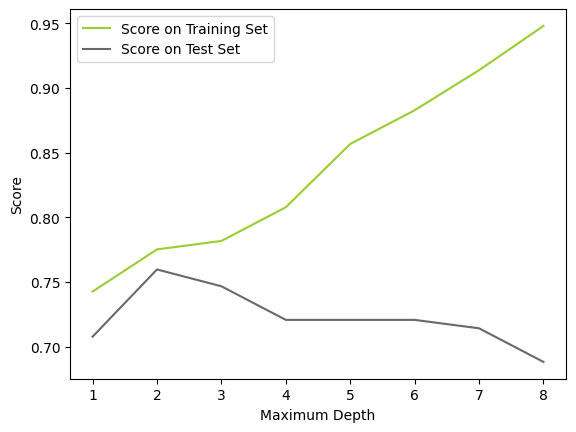

In [30]:
plt.plot(list(range(1,9)), scores_train, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,9)), scores_test, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

Until now you were evaluating a parameter at a time. But how can you evaluate two parameters at the same time?

**Step 29 -** In this step, you create two lists containing the scores for the train and test sets for multiple values of `min_samples_split` and `max_depth`.

In [31]:
scores_train = []
scores_test = []
parameters = []
for i in range(10, 20):
    for j in range(1,7):
        parameters.append([i,j])
        DTR = DecisionTreeClassifier(min_samples_split=i, max_depth=j)
        DTR.fit(X_train, y_train)
        scores_train.append(DTR.score(X_train, y_train))
        scores_test.append(DTR.score(X_test, y_test))

In [32]:
len(scores_train)

60

**Step 30 -** Plot the scores to get the least overfitting value.

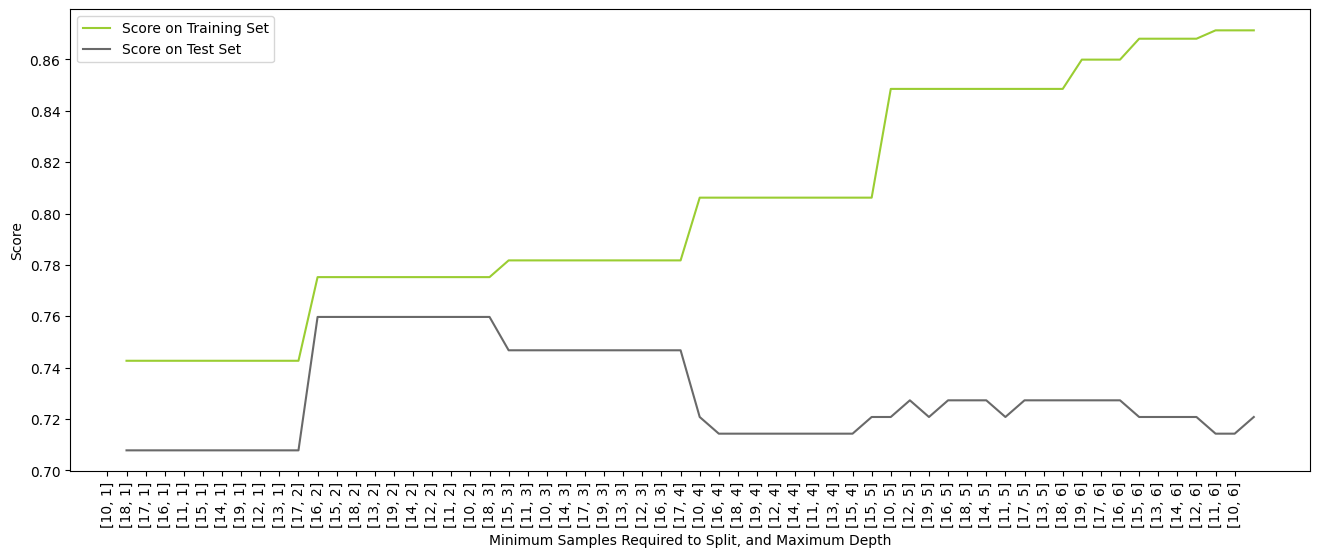

In [33]:
scores = pd.DataFrame({'Score_Train': scores_train,'Score_Test': scores_test,'Parameters': parameters}).sort_values(by=['Score_Train'])
plt.figure(figsize=(16,6))
plt.plot(list(range(1,61)), scores['Score_Train'], label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,61)), scores['Score_Test'], label="Score on Test Set", color='dimgray')
plt.xlabel("Minimum Samples Required to Split, and Maximum Depth")
plt.ylabel("Score")
plt.xticks(np.arange(len(parameters)), scores['Parameters'])
plt.xticks(rotation=90)
plt.legend()
plt.show()

# <font color='#BFD72F'>4. Multiclass problem with Decision Trees</font> <a class="anchor" id="multi"></a>
[Back to Contents](#toc)

We will use cross-validation to tune hyperparameters for multiclass problem. This method is time consuming, if you want to test every possible combination of parameters, however, it will provide more reliable results.

**Step 31 -** Define cross_validation function that will be used to find optimal hyperparameters for the model based on validation Weighted F1-score.

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import random
from tqdm import tqdm

In [35]:
def cross_validation(X, y, model, method):
  score_train = []
  score_val = []

  # Method: KFold
  for train_index, val_index in method.split(X,y):

    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Fit train, predict on train and val
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)

    # Calculate weighted F1 score
    value_train = f1_score(train_pred, y_train, average = 'weighted')
    value_val = f1_score(val_pred, y_val, average = 'weighted')

    # Append it to score lists
    score_train.append(value_train)
    score_val.append(value_val)

  return np.mean(score_train), np.mean(score_val)


**Step 32 -** Run cross-validation for a grid of hyperparameters. Since grid of possible hyperparameters can be huge we will go with a random search.


We will use DecisionTreeClassifier with the default parameters except class_weight as a model.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as: <br> n_samples / (n_classes * np.bincount(y)).

It is useful, when you have imbalanced data to assign more influence to the observations from minority classes.

In [36]:
#Initialize random seed to make results reproducible
random.seed(15)

# Set parameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}


# List to store results
result = []

# How many different sets of parameters we will try
num_iterations = 30

# Splits in cross-validation
kf = StratifiedKFold(n_splits=5)

for i in tqdm(range(num_iterations)):

    # Choose random parameters from parameters grid
    random_params = {}
    for key, values in param_grid.items():
        random_params[key] = random.choice(values)

    # Define model and set parameters
    model = DecisionTreeClassifier()
    model.set_params(**random_params)

    train_f1, val_f1 = cross_validation(X_train_multiclass, y_train_multiclass, model, kf)

    result.append([train_f1, val_f1, list(random_params.values())])


100%|██████████| 30/30 [00:18<00:00,  1.59it/s]


**Step 33 -** Plot the scores.

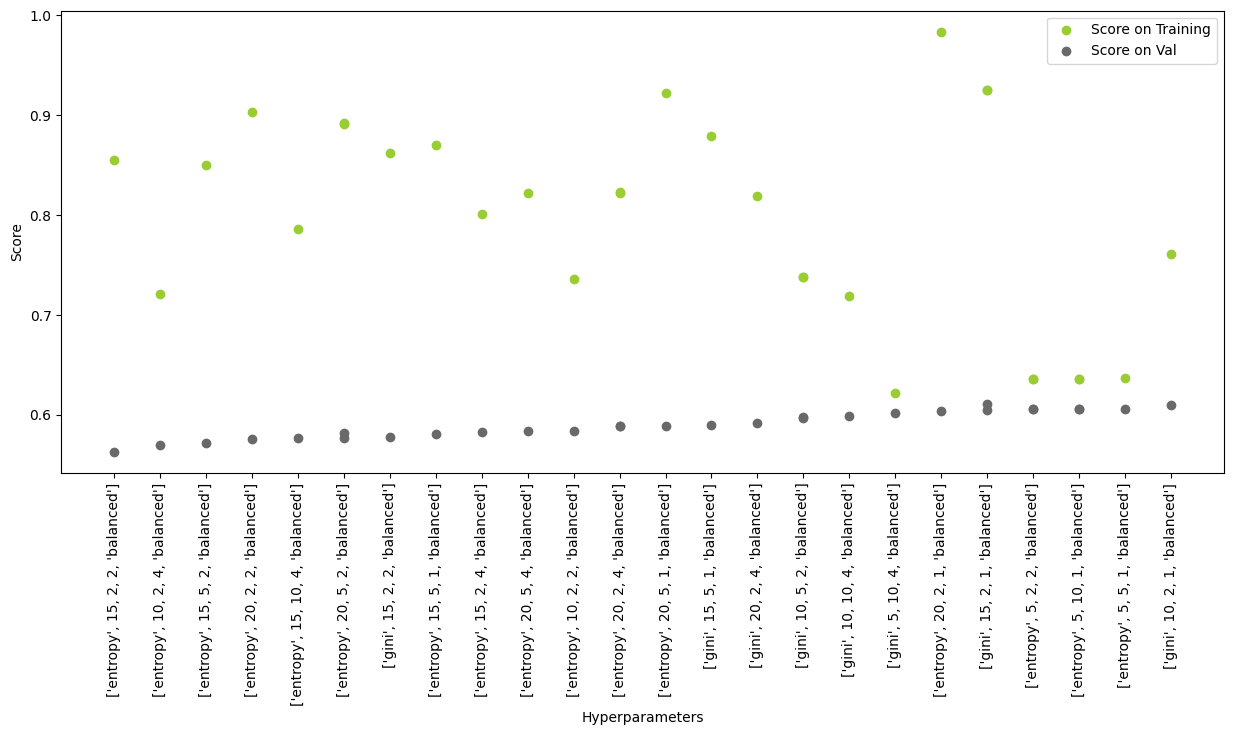

In [37]:
scores = pd.DataFrame(result, columns = ['Score_Train', 'Score_Val', 'Parameters']).sort_values('Score_Val')
plt.figure(figsize=(15,6))
plt.scatter(scores['Parameters'].astype(str), scores['Score_Train'], label="Score on Training", color='yellowgreen')
plt.scatter(scores['Parameters'].astype(str), scores['Score_Val'], label="Score on Val", color='dimgray')
plt.xlabel("Hyperparameters")
plt.ylabel("Score")
plt.xticks(rotation=90)
plt.legend()
plt.show()

**Step 34 -** Predict on test data.

You should choose your best model by validation score, fit all the training data and predict on test.

In [38]:
# Model definition
model = DecisionTreeClassifier(class_weight = 'balanced',
                               criterion = 'gini',
                               max_depth = 10,
                               min_samples_split=2,
                               min_samples_leaf=1)

# Fit and predict
model.fit(X_train_multiclass, y_train_multiclass)
y_pred = model.predict(X_test_multiclass)

# Calculate score
f1_score(y_test_multiclass, y_pred, average = 'weighted')

0.6326668886348882

# <font color='#BFD72F'>5. Regression Trees</font> <a class="anchor" id="reg"></a>
[Back to Contents](#toc)

A regression tree is a type of decision tree where each leaf represents a numeric value and not a discrete category like in classification decision trees.

<img src="https://drive.google.com/uc?id=15KINK7e0hQO9lZgXG4-Gc1p4qGvYr2Qa" width="900px"> <img name="reg_tree.png">

**Step 35 -** Import `DecisionTreeRegressor` from `sklearn.tree` and create an instance of it with the default parameters. Fit it to a regression dataset.

[Check Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

Note: In Model Evaluation and Comparison class we have seen `LinearRegression`, can use is it as example.

In [39]:
# Try at home

# <font color='#BFD72F'>6. Extra: Classification Cut-off</font> <a class="anchor" id="cutoff"></a>
[Back to Contents](#toc)

As seen in theoretical class of Model Evaluation, the default cut-off value for binary classification is 0.5:
- If >= 0.5, then classify as “1”
- If <0.5, classify as “0"

But we can use different cut-off values (neverthless, error rate is typically lowest for cut-off = 0.5).

**Step 36 -** Fit a model to the binary dataset, `X_train` and `y_train`, make predictions for `X_test`, and print the classification report.

In [40]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



**Step 37 -** Use the `TunedThresholdClassifierCV` from `sklearn` to post-tune the decision threshold (cut-off point). <br>
Note: As default parameter, the metric to be optimized is `balanced_accuracy`.

In [42]:
from sklearn.model_selection import TunedThresholdClassifierCV

model_threshold_tune = TunedThresholdClassifierCV(model).fit(X_train, y_train)
y_pred = model_threshold_tune.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.68      0.76       100
           1       0.58      0.81      0.68        54

    accuracy                           0.73       154
   macro avg       0.73      0.75      0.72       154
weighted avg       0.77      0.73      0.73       154



**Step 38 -** Use the `.best_threshold_` attribute that obtains the `.best_score_`, which by default is ”balanced_accuracy”.

In [43]:
model_threshold_tune.best_threshold_

0.3584848484848485

<b><font size="6"> Don't forget to practice at home &#128521;</font>